In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB3

import warnings
warnings.filterwarnings("ignore")

In [110]:
import cv2

In [111]:
data_dir='data'

In [112]:
os.listdir(data_dir)

['happy', 'sad']

In [113]:
image_exts=['jpeg','jpg','png','bmp']

In [114]:
image_exts

['jpeg', 'jpg', 'png', 'bmp']

In [115]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_path):
        continue  # Skip non-directory files
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:
            img = cv2.imread(image_path)
            with Image.open(image_path) as img_pil:
                tip = img_pil.format.lower()
            if tip not in image_exts:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)  # Remove file if extension not valid
        except Exception as e:
            print(f'Issue with image: {image_path} - {e}')

Image not in ext list: data\happy\happy2.jpg
Image not in ext list: data\happy\happy3.jpg


In [116]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 454 files belonging to 2 classes.


In [117]:
data_iterator=data.as_numpy_iterator()

In [118]:
batch=data_iterator.next()

In [119]:
batch[1]
# 0 in our case is happy and 1 is sad

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [121]:
data=data.map(lambda x,y:(x/255,y))

In [122]:
scaled_iterator=data.as_numpy_iterator()

In [123]:
batch=scaled_iterator.next()

In [124]:
batch[0].max()

1.0

In [125]:
len(data) #15 means its 15 batches with 32 images each

15

In [126]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [127]:
test_size

2

In [128]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [129]:
len(train)

10

In [130]:
len(val)

3

In [131]:
len(test)

2

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input

In [133]:
model = Sequential([
    Input(shape=(256, 256, 3)),  # Explicitly define the input shape
    Conv2D(16, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [134]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
logdir='logs'

In [137]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [138]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.4722 - loss: 0.9755 - val_accuracy: 0.5417 - val_loss: 0.6830
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.5939 - loss: 0.6761 - val_accuracy: 0.5208 - val_loss: 0.7051
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.5882 - loss: 0.6754 - val_accuracy: 0.5729 - val_loss: 0.6944
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.6053 - loss: 0.6466 - val_accuracy: 0.6875 - val_loss: 0.6106
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.6844 - loss: 0.5987 - val_accuracy: 0.6667 - val_loss: 0.6017
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.6938 - loss: 0.5868 - val_accuracy: 0.6979 - val_loss: 0.5718
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - accuracy: 0.7412 - loss: 0.5528 - val_accuracy: 0.7604 - val_loss: 0.5087
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.8291 - loss: 0.4498 - val_accuracy: 0.

In [139]:
hist.history

{'accuracy': [0.484375,
  0.6000000238418579,
  0.6031249761581421,
  0.621874988079071,
  0.659375011920929,
  0.6968749761581421,
  0.7437499761581421,
  0.784375011920929,
  0.762499988079071,
  0.809374988079071,
  0.856249988079071,
  0.8843749761581421,
  0.893750011920929,
  0.9375,
  0.971875011920929,
  0.984375,
  0.971875011920929,
  0.987500011920929,
  0.984375,
  0.96875],
 'loss': [0.8634098172187805,
  0.6741153597831726,
  0.6776423454284668,
  0.6363431215286255,
  0.6113738417625427,
  0.5793720483779907,
  0.5449336767196655,
  0.4735437035560608,
  0.4678041934967041,
  0.4101029932498932,
  0.31880807876586914,
  0.3086596131324768,
  0.24457018077373505,
  0.18315425515174866,
  0.12360024452209473,
  0.08421610295772552,
  0.07179665565490723,
  0.05820145457983017,
  0.05353524535894394,
  0.09850650280714035],
 'val_accuracy': [0.5416666865348816,
  0.5208333134651184,
  0.5729166865348816,
  0.6875,
  0.6666666865348816,
  0.6979166865348816,
  0.760416686534

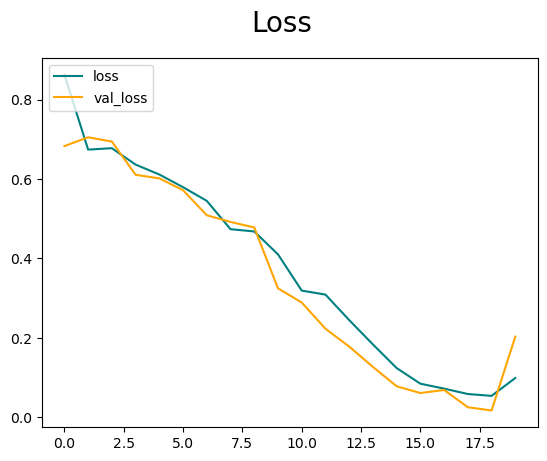

In [140]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [141]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [142]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [143]:
len(test)

2

In [144]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat= model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [145]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:0.8421052694320679,Accuracy:0.9210526347160339


In [146]:
import cv2

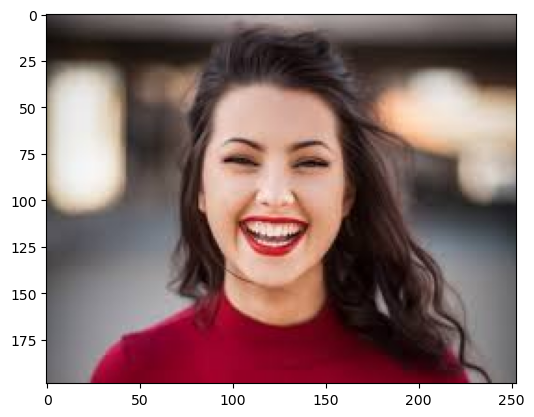

In [148]:
img=cv2.imread('happy1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

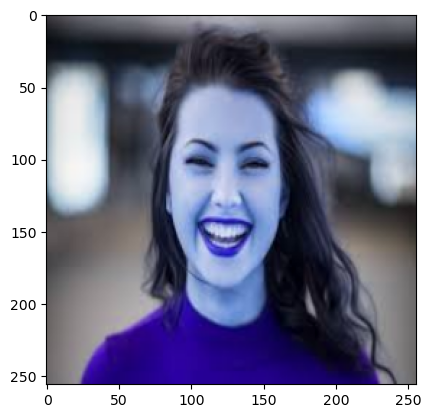

In [149]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [151]:
yhat

array([[0.00093742]], dtype=float32)